## DATA PRE-PROCESSING WITH PYTHON
#### École d'ingénieurs Léonard de Vinci, La Défense, Paris
**Hugo Alatrista Salas** 

**Note:** This is a graded job.

***

Data pre-processing is crucial in data analytics because it ensures the data is clean, consistent, and ready for analysis. Techniques like discretization help convert continuous data into categorical intervals, making it easier to interpret patterns or use certain machine learning algorithms. Normalization adjusts the scale of features, ensuring that no single feature dominates due to magnitude differences, which is particularly important for algorithms that rely on distance measurements. Handling missing values by replacing or imputing them prevents biased results and incomplete analyses. Outlier detection helps in identifying anomalies that could distort analysis or represent significant insights. Together, these preprocessing techniques enhance data quality, leading to more accurate and meaningful outcomes in data analytics.

Our goal in this lab is to showcase the significance of these techniques in the context of data analysis.

We start this TP importing the libraries and reading a CSV file. This is possible thanks to the *read_csv* method of Pandas class.

In [153]:
# -*- coding: utf-8 -*-
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

In [154]:
# Reading the data
df = pd.read_csv("data/data.csv", sep=",", decimal=".", engine='python')

## Discretization using equal ranges

Discretization is a process by which continuous data is transformed into discrete data, a key aspect of data analysis. One of the first challenges in this process is determining the number of *bins*, classes, or groups of data we want to obtain. Once the number of bins has been selected, we must consider the discretization technique to be used. The first technique learned in the course is the *equal range* discretization. Fortunately, Pandas offers us the cut function, which simplifies our tasks.

### Exercise 1 (1/2 point)

In this part, the feature temperature will be used. Before discretizing data at our disposal, we have to know the minimal and maximal values of the *TEMP* feature. There are many different ways to extract these values. Note that we will work only with the temperature feature; then, all results will only show these features. Write a Python code to show the min and max values of *TEMP* feature.

In [155]:
# Here your answer 1
temp = df['TEMP']

min_temp = temp.min()
max_temp = temp.max()

print(f"Minimum Temperature: {min_temp}")
print(f"Maximum Temperature: {max_temp}")


Minimum Temperature: 59.1
Maximum Temperature: 78.2


We can see that the temperature value varies between $59.1$ and $78.2$. In order to discretize the Temperature attribute, we will choose the number of *bins* or classes we want to obtain. For example, imagine that we want to obtain $3$ classes or bins. To do this, we create a vector with the classes we want to build.

In [156]:
bins = [50, 60, 70, 80]

In the vector above, we are implicitly forming three bins or ranges of values: $(50 - 60], (60-70], (70-80]$, that is, values ​​between $51$ and $60$, values ​​between $61$ and $70$, etc. Using the vector *bins* created above, we transform the temperature data into the three classes. We can do that with the following statement.

In [157]:
cat_ranges = pd.cut(df['TEMP'], bins)

In the previous line, we created a variable *cat_ranges* and stored the discrete representation of the continuous temperature values. Then, all that remains is to display the new variable called *cat_ranges*. This is done with a simple **print(cat_ranges)**. We must remember that *cat_ranges* is a new variable and is not associated with our *dataframe* of meteorological data.

In [158]:
cat_ranges

0      (70, 80]
1      (70, 80]
2      (70, 80]
3      (70, 80]
4      (70, 80]
         ...   
229    (60, 70]
230    (60, 70]
231    (60, 70]
232    (60, 70]
233    (60, 70]
Name: TEMP, Length: 234, dtype: category
Categories (3, interval[int64, right]): [(50, 60] < (60, 70] < (70, 80]]

On the other hand, the **cut** function has two other parameters that might be useful: the first is **right=False**, which inverts the inclusive side, i.e., $(50-60]$ will be $[50-60)$. The cut method has also the **labels=['x','y','z']** parameter allowing us to add custom labels ('x','y','z') to our value ranges. In our example, this last parameter can be used as follows:

In [159]:
cat_ranges = pd.cut(df["TEMP"], bins, labels=['Temp 50-60','Temp 60-70','Temp 70-80'])

Then, we can do a *print* again to see how our **bins** turned out.

In [160]:
cat_ranges

0      Temp 70-80
1      Temp 70-80
2      Temp 70-80
3      Temp 70-80
4      Temp 70-80
          ...    
229    Temp 60-70
230    Temp 60-70
231    Temp 60-70
232    Temp 60-70
233    Temp 60-70
Name: TEMP, Length: 234, dtype: category
Categories (3, object): ['Temp 50-60' < 'Temp 60-70' < 'Temp 70-80']

Finally, we can see the frequency distribution for each of our value intervals using the following statement **print(categories.value\_counts())**

In [161]:
print(cat_ranges.value_counts())

TEMP
Temp 70-80    120
Temp 60-70    106
Temp 50-60      8
Name: count, dtype: int64


Now we will visualize the number of elements per *bins*

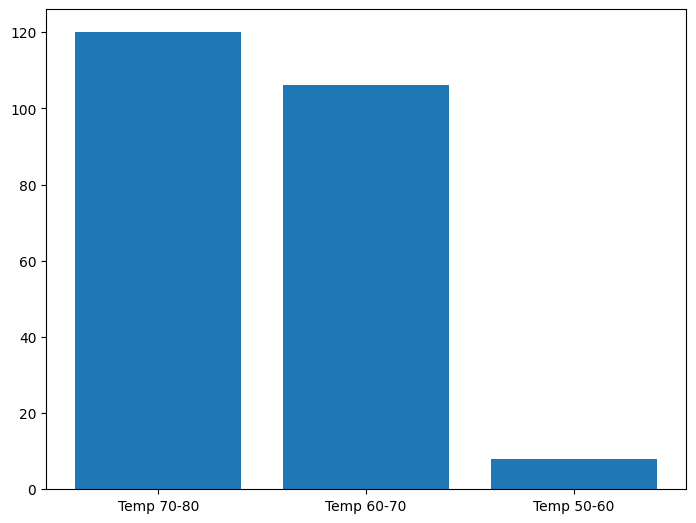

In [162]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1]) # This line helps us to create 3 bars 
ax.bar(cat_ranges.value_counts().keys(),cat_ranges.value_counts())
plt.show()

## Discretization using equal frequencies

As we can see from the results of the previous discretization technique, the number of instances per **bin** or class differs substantially. To have more homogeneous **bins** (in the number of instances per bin), we can use the "equal frequency discretization" technique. In Pandas, the function that does this job is **qcut**. Since the equal frequency technique separates the data into bins with the same number of instances per class, we do not need to build a **bins** vector as in the previous technique. The function only requires the column (or data) and the number of bins to be discretized. For example, we use the following expression to discretize the temperature into $3$ intervals using *equal frequencies*.

In [163]:
cat_freq = pd.qcut(df['TEMP'], 3)

We can see which categories were built with the discretization thanks to the sentence *cat.categories*

In [164]:
cat_freq.cat.categories

IntervalIndex([(59.099000000000004, 64.4], (64.4, 73.3], (73.3, 78.2]], dtype='interval[float64, right]')

For display purposes, we will rename the bin labels with letters *a*, *b*, and *c*.

In [165]:
cat_freq = cat_freq.cat.rename_categories(list("abc"))

To depict the frequency distribution for each *bin*, we use the statement **print(categories1.value\_counts())**.

In [166]:
cat_freq.value_counts()

TEMP
a    79
b    78
c    77
Name: count, dtype: int64

Now we will visualize the number of elements per *bins*

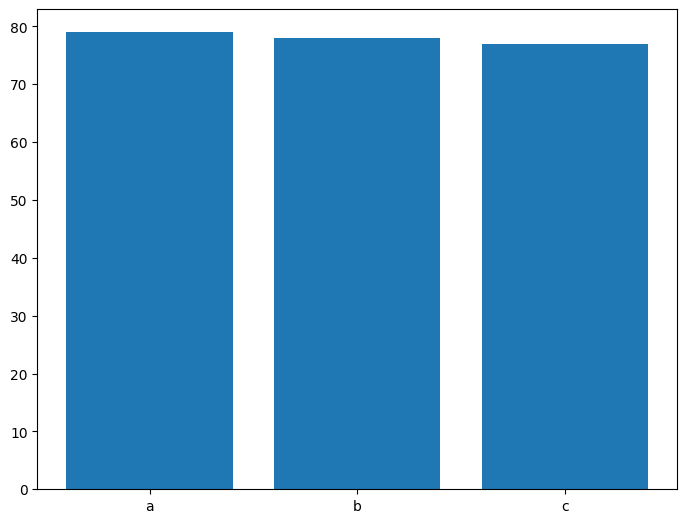

In [167]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(cat_freq.value_counts().keys().to_list(),cat_freq.value_counts())
plt.show()

### Exercise 2 (4 points)

In previous blocks of code, we have studied two discretizing techniques: equal range and equal frequency discretization. We will now encapsulate these two techniques into a class. The class constructor should take two parameters: a list of numerical values and the number of bins *nbins*. It should also implement the two discretization techniques. It is important to note that, in previous examples of this lab, we post-process the result in order to show values and bins nicely, but in this case, our class should show standard results, i.e., the list of bins and the edges of the bins. 

In addition, a method to plot a frequency histogram should be implemented. This should take the list of bins and edges as parameters. To this aim, think of having a list of unique bins and their frequencies. Also, the list of bins might be transformed into a range of values, like [i, i+1]. In this manner, your code will capture and show the right bin edges. 

In [168]:
# Here your code
class Discretizer:
    def __init__(self, values, nbins):
        self.values = values
        self.nbins = nbins
    
    def equal_range_discretization(self):
        bins = np.linspace(min(self.values), max(self.values), self.nbins + 1)
        discretized_values = np.digitize(self.values, bins, right=True)
        return discretized_values, bins
    
    def equal_frequency_discretization(self):
        quantiles = np.linspace(0, 1, self.nbins + 1)
        bins = np.quantile(self.values, quantiles)
        discretized_values = np.digitize(self.values, bins, right=True)
        return discretized_values, bins
    
    def plot_histogram(self, discretized_values, bins):
        unique_bins, bin_frequencies = np.unique(discretized_values, return_counts=True)
        
        plt.bar(unique_bins, bin_frequencies, align='center', edgecolor='black')
        
        if len(unique_bins) == len(bins) - 1:
            plt.xticks(unique_bins, [f"[{int(bins[i])}, {int(bins[i+1])}]" for i in range(len(bins)-1)], rotation=45)
        else:
            plt.xticks(unique_bins, unique_bins, rotation=45)
        
        plt.xlabel("Bins")
        plt.ylabel("Frequency")
        plt.title("Frequency Histogram")
        plt.show()

Equal Range Discretization: 
 [4 4 4 4 4 4 5 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 4 4 4 5
 4 5 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 5 5 4 3 4 3
 3 4 4 3 4 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 3 3 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1]
Bin Edges: [59.1  62.92 66.74 70.56 74.38 78.2 ]


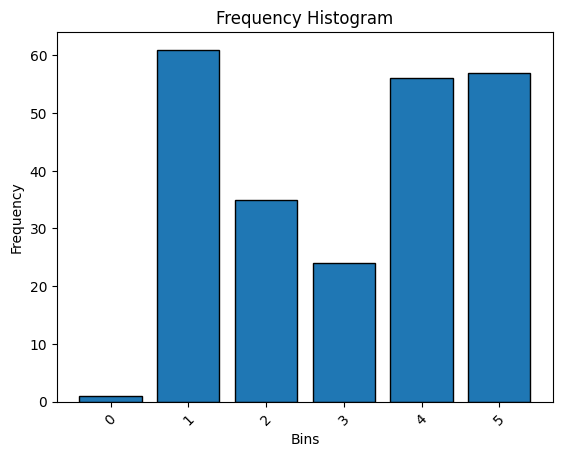

Equal Frequency Discretization: 
 [3 4 4 4 4 4 4 4 4 4 3 3 3 3 4 3 4 3 4 4 4 4 5 5 5 4 4 5 5 4 4 5 4 4 4 4 4
 4 5 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 4 5 5 5 5 5 5 5 4 4 4 4 4 3 3 3 4 4 3 3 4 4 4 4 3 3 4 3 3 3 4 4 4 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 2 2 2 2 2 2 2 2 2 2 2
 3 3 3 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 1 2
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 2 2 1 2 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1]
Bin Edges: [59.1  61.66 65.86 72.4  74.7  78.2 ]


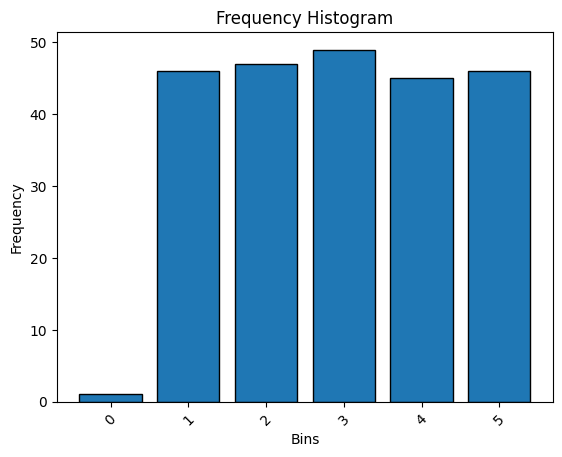

In [169]:
# Test your class here
temp_values = df['TEMP'].dropna().tolist()

discretizer = Discretizer(temp_values, 5)

equal_range_bins, equal_range_edges = discretizer.equal_range_discretization()
print("Equal Range Discretization: \n", equal_range_bins)
print("Bin Edges:", equal_range_edges)

discretizer.plot_histogram(equal_range_bins, equal_range_edges)

equal_freq_bins, equal_freq_edges = discretizer.equal_frequency_discretization()
print("Equal Frequency Discretization: \n", equal_freq_bins)
print("Bin Edges:", equal_freq_edges)

discretizer.plot_histogram(equal_freq_bins, equal_freq_edges)

'''
data = [8, 2, 20, 4, 5, 17, 7, 8, 9, 9, 9, 12, 13, 14, 15, 16, 17, 18, 19, 20] and nbins = 4
Your result should show something like
equal_width = (array([1, 0, 3, 0, 0, 3, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3]), array([ 1.982,  6.5  , 11.   , 15.5  , 20.   ]))
equal_frequency = (array([0, 0, 3, 0, 0, 2, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3]), array([ 2. ,  8. , 12.5, 17. , 20. ]))
Note: My solution shows the list of the bins' values and the edges of each bin (in two different lists returned by the same function). 
Other possible solutions are possible, but the list containing the bins belonging to each value of the input list should be the same as my example.
'''

data = [8, 2, 20, 4, 5, 17, 7, 8, 9, 9, 9, 12, 13, 14, 15, 16, 17, 18, 19, 20]


## Outlier detection

Outlier detection is a crucial aspect of data analytics, as it helps identify observations that significantly deviate from the expected patterns in a dataset. These outliers may result from data entry errors, measurement noise, or reflect rare but important events. In analytics, detecting and handling outliers is essential for improving data quality, as outliers can distort statistical measures like the mean and standard deviation, leading to misleading insights.
Outliers can negatively impact machine learning models by skewing the results, so addressing them ensures a more reliable and accurate analysis. In some cases, outliers indicate critical events, such as fraud or system malfunctions, making their detection vital for decision-making and problem-solving. In this section, we will study different ways to detect outliers with Python and some of its libraries.

### Exercise 3 (2 point)

Take your lab 2 code related to the Normalization class implementation. Transform it into a **.py** file (e.g., *Normalization.py*). Store it in a new directory (e.g., P4DA). This new directory will used as a module in Python. Having our module P4DA and inside a class Normalization, we can import our class using the sentence **from MODULE import CLASS**. 

In [170]:
# Your class was imported correctly if the following like runs without errors

from P4DA.normalization import Normalization as mynor

### Exercise 4 (1/2 point)

Once your class Normalization has been imported, it is time to recover the CSV file. The dataset used in this lab was provided by the USA Forensic Science Service, which studies the classification of types of glass in a criminological investigation. It contains 214 instances and 9 features. The complete information about the dataset is available at https://archive.ics.uci.edu/dataset/42/glass+identification.

In [171]:
# Here your code
df = pd.read_csv("data/df_glass.csv", sep=",", decimal=".", engine='python')

### Exercise 5 (4 points)

Now, it is time to detect outliers from a complete dataset. Then, write a function that automatically detects outliers for each dataframe column. Obviously, features with discrete, ordinal, or binary datatypes will be avoided. The input of this function should be a dataframe, and the function selects the numerical features and analyzes them with the z-score normalization method of our Normalization class. One important thing is that we need a threshold for detecting the outliers. Indeed, for extracting outliers from a list, first, we transform their values using the z-score normalization; later, we compare the abs() of each value with a threshold. In this exercise, let us fix this threshold in 3.

In [172]:
# Here your code
def detect_outliers(df, threshold=3):
    outliers = {}

    # Select only numerical columns
    numerical_df = df.select_dtypes(include=[np.number])
    
    # Iterate through each numerical column
    for column in numerical_df.columns:
        # Extract the values for the column
        values = numerical_df[column].dropna().tolist()
        
        # Normalize the values using Z-Score normalization
        normalizer = mynor(values)
        z_scores = normalizer.z_score_normalization()
        
        # Detect outliers (abs(z_score) > threshold)
        column_outliers = [value for value, z_score in zip(values, z_scores) if abs(z_score) > threshold]
        
        if column_outliers:
            outliers[column] = column_outliers

    return outliers

In [173]:
# Test your code here
outliers_detected = detect_outliers(df, threshold=3)

# Display the detected outliers for each column
for column, outliers in outliers_detected.items():
    print(f"Outliers in {column}: {outliers}")

'''
Your answer should be the following (if you are storing the outlies as a dictionary of lists)
{'Id number': [], ' RI': [4.252673357413172, 5.137231883487097, 3.1040675101231807], 
'Mg': [-3.2869427542411156, 4.875637487898511], 'Al': [], 'Si': [4.125850610450435, 3.2023445414339937, 3.16219210365067], 
'K_Pota': [-3.676471617584673, -3.223534378034229, -3.572943105687429, 3.5705242152225387, -3.0941237381626605, 3.2728797435179695], 
'Ca': [8.780144872002806, 8.780144872002806, 3.3856741920775777], 
'Ba': [3.01659640155971, 3.0588551464412, 5.094318024899604, 4.030806278715454, 4.228013754829072, 3.8335988026018377, 3.1574588844980074], 
'Fe': [5.997210462947946, 4.082104771949395, 3.0338363937186092, 3.094313415539616, 5.452917266558884, 3.0136773864449404], 
'iron': [3.0139730766299326, 3.219711589675804, 4.659881180996901], 'glass_type': []}
'''

Outliers in  RI: [1.53125, 1.53393, 1.52777]
Outliers in Mg: [10.73, 17.38]
Outliers in Si: [3.5, 3.04, 3.02]
Outliers in K_Pota: [69.81, 70.16, 69.89, 75.41, 70.26, 75.18]
Outliers in Ca: [6.21, 6.21, 2.7]
Outliers in Ba: [13.24, 13.3, 16.19, 14.68, 14.96, 14.4, 13.44]
Outliers in Fe: [3.15, 2.2, 1.68, 1.71, 2.88, 1.67]
Outliers in iron: [0.35, 0.37, 0.51]


"\nYour answer should be the following (if you are storing the outlies as a dictionary of lists)\n{'Id number': [], ' RI': [4.252673357413172, 5.137231883487097, 3.1040675101231807], \n'Mg': [-3.2869427542411156, 4.875637487898511], 'Al': [], 'Si': [4.125850610450435, 3.2023445414339937, 3.16219210365067], \n'K_Pota': [-3.676471617584673, -3.223534378034229, -3.572943105687429, 3.5705242152225387, -3.0941237381626605, 3.2728797435179695], \n'Ca': [8.780144872002806, 8.780144872002806, 3.3856741920775777], \n'Ba': [3.01659640155971, 3.0588551464412, 5.094318024899604, 4.030806278715454, 4.228013754829072, 3.8335988026018377, 3.1574588844980074], \n'Fe': [5.997210462947946, 4.082104771949395, 3.0338363937186092, 3.094313415539616, 5.452917266558884, 3.0136773864449404], \n'iron': [3.0139730766299326, 3.219711589675804, 4.659881180996901], 'glass_type': []}\n"

### Using a modified Z-Score transformation for outlier detection 

When data are skewed or not normally distributed, the modified z-score, also known as the MAD-Z-Score, offers a simple yet effective solution. Unlike the z-score, it uses the median and the median absolute deviation (MAD) instead of the mean and standard deviation, making it easier to understand and apply while avoiding the effect of outliers on the latter two measures.

Therefore, the modified z-score measures how far a value is from the median in terms of the median absolute deviation. In other words, it tells us how many median absolute deviations, or MADs, a data point is from the median of the distribution.

In this context, a threshold of 3.5 is often used to consider a data point to be an outlier (Hoaglin, D.C. (2013). Volume 16: How to Detect and Handle Outliers). The equation to compute the modified Z-Score normalization is the following.

$$
M_i = \frac{0.6745 \times (x_i-mediana)}{MAD}
$$

### Exercise 6 (2 points)

Write a function that uses as an imput a list and returs the list of outliers from this list. The method used by identifying the outlier is the modified Z-Score abobe described.

In [174]:
# Here your code
def modified_z_score_outliers(values, threshold=3.5):
    """
    Detects outliers using the modified Z-Score method.
    
    Parameters:
    values (list): List of numerical values
    threshold (float): The threshold for identifying outliers (default is 3.5)
    
    Returns:
    list: List of outliers
    """
    median_val = np.median(values)
    
    mad = np.median([abs(x - median_val) for x in values])
    
    if mad == 0:
        return []
    
    modified_z_scores = [(0.6745 * (x - median_val)) / mad for x in values]
    
    outliers = [x for x, z in zip(values, modified_z_scores) if abs(z) > threshold]
    
    return outliers

In [175]:
# Test your code here
'''
data = [1, 2, 2, 2, 3, 3, 10, 12, 12, 14, 15, 100]
Outliers: [100]
'''
data = [1, 2, 2, 2, 3, 3, 10, 12, 12, 14, 15, 100]
outliers = modified_z_score_outliers(data, threshold=3.5)
print(f"Outliers: {outliers}")

Outliers: [100]


## Missing data

Another topic studied in the main course is the imputation of missing data in a dataset. There are several techniques, even very sophisticated ones. In this lab, we use the median to replace missing values ​​in our data frame. For example, we will create a data frame with the height (in meters) of 10 individuals. Now, we add missing values ​​to our data frame of weights. For this, we use the Numpy library. The following lines do that.

In [176]:
df1 = pd.DataFrame()
df1['weight'] = [1.589491718, 1.650781882, 1.713147405, 1.713566229, 1.721236971, 1.729617843, 1.734294905, 1.766343383,
               1.801768905, 1.839402089, 1.886878334, 1.935731523, 1.948178893, 2.10379666, 22.81353]
series = pd.Series([np.nan], index = ["weight"])
df1 = pd.concat([df1, series.to_frame().T], ignore_index=True)

In [177]:
df1

,weight
0,1.589492
1,1.650782
2,1.713147
3,1.713566
4,1.721237
5,1.729618
6,1.734295
7,1.766343
8,1.801769
9,1.839402


We then tell Pandas to fill the missing values ​​(represented by Nan) with the mean.

In [178]:
new_df1 = df1.fillna(df1.mean())
new_df1

,weight
0,1.589492
1,1.650782
2,1.713147
3,1.713566
4,1.721237
5,1.729618
6,1.734295
7,1.766343
8,1.801769
9,1.839402


### Exercise 7 (1 point)

Is the value assigned to the missing value correct? Modify the dataframe in order to rectify the error (if any). 

**Tip:** the Clipping method can be used in this exercise, but other solutions are also possible. 

In [179]:
# Here your answer

# No, the filled value is uncorrect. We have two solutions: 
# 1) Delete the outlier (you can use the modified Z-Score) and recalculate the missing value. 
# 2) Use the Clipping method (implemented in the previous lab) and recalculate the missing value.

clipped_df1 = df1.clip(lower=1.5, upper=2.5)

# Fill NaN with the mean of the clipped DataFrame
new_df1 = clipped_df1.fillna(clipped_df1.mean())

# Print the result
print(new_df1)

      weight
0   1.589492
1   1.650782
2   1.713147
3   1.713566
4   1.721237
5   1.729618
6   1.734295
7   1.766343
8   1.801769
9   1.839402
10  1.886878
11  1.935732
12  1.948179
13  2.103797
14  2.500000
15  1.842282


It is time to use real data using different techniques to fill out NaN values. In this part, we will use a dataset related to diabetes. This dataset contains 768 rows and 9 features. The last feature represents the class. This dataset includes 652 missing values distributed in 5 of the 9 columns. First, the dataset called *Diabetes.csv* should be uploaded and stored in a dataframe. Later, we count the number of NaN values by column.

In [180]:
df3 = pd.read_csv("data/Diabetes.csv", sep=",", decimal=".")
print(df3.isnull().sum())

Pregnant               0
Glucose                5
Diastolic_BP          35
Skin_Fold            227
Serum_Insulin        374
BMI                   11
Diabetes_Pedigree      0
Age                    0
Class                  0
dtype: int64


### Exercise 8 (1 point)

Replace NaN values for the entire dataframe. Validate your answer by counting the missing values again.

**Note:** Do not forget to create another dataframe with the new values 

In [181]:
# Here your code
# Count the number of NaN values by column
# Create a new dataframe with NaN values replaced by the mean of each column

#Copy the df3 dataframe for our tests
df3_bis = df3.copy()
columns_list = df3_bis.columns.tolist()
print(df3_bis.isnull().sum())

for col in columns_list :
    # To extract the outliers, we have to compute on a dataframe without NaN values
    data_without_nan = df3_bis[col].dropna() #MAD outliers extractor needs a list as input for this exemple

    # Extract outliers
    outliers = modified_z_score_outliers(data_without_nan.values)

    # Delete outliers from dataframe
    cleaned_data = data_without_nan[~df3_bis[col].isin(outliers)]

    # Compute the mean on the clean data
    new_value = cleaned_data.mean()

    # replace by the mean
    df3_bis[col].fillna(new_value, inplace=True)

print(df3_bis.isnull().sum())

Pregnant               0
Glucose                5
Diastolic_BP          35
Skin_Fold            227
Serum_Insulin        374
BMI                   11
Diabetes_Pedigree      0
Age                    0
Class                  0
dtype: int64
Pregnant             0
Glucose              0
Diastolic_BP         0
Skin_Fold            0
Serum_Insulin        0
BMI                  0
Diabetes_Pedigree    0
Age                  0
Class                0
dtype: int64


### KNN for missing values filling

Other methods have been proposed in the last few years. For instance, the KNNImputer is an algorithm used to fill missing values in a dataset by leveraging the K-nearest neighbors (KNN) approach. It works by finding the k closest data points (neighbors) based on the non-missing values of a sample and then imputes the missing values by averaging the corresponding values of those neighbors. The algorithm calculates distances, typically using Euclidean distance, and imputes values based on either equal weights or by giving more influence to closer neighbors. Key parameters include n_neighbors (the number of neighbors to consider), weights (how to weigh the neighbors when imputing), and metric (the method to calculate distances). This method is particularly effective when neighboring data points are similar, making it more reliable than straightforward methods like mean or median imputation (it depends of the dataset).

In this lab, we will use the KNNImputer implementation from the library sklearn. The following lines use KNNImputer in our data frame. 

In [182]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=4, weights="uniform")
new_df3_nonNaN = imputer.fit_transform(df3)

column_names = df3.columns.tolist()
new_new_df3 = pd.DataFrame(new_df3_nonNaN, columns=column_names)
new_new_df3['Class'] = df3['Class']

### Exercise 9 (2 puntos)

What is the function of the last line, and why is it necessary?

In [183]:
# Here your answer
# this line is necessary for maintaining the integrity of your dataset 
# by ensuring that the target variable is present alongside the imputed 
# feature data, which is crucial for any analysis or modeling tasks that follow.

### Exercise 10 (4 puntos)

Handling missing data is a critical step in data preprocessing, as it can significantly affect the performance of machine learning models. In this assignment, participants will explore the impact of different techniques for filling in missing values on the accuracy of a classification model. Specifically, we will compare a simple imputation method using the mean of the feature with a more advanced imputation approach using the KNNImputer. The steps requested in this exercise contain the following:

1. On the one hand,  mean imputation will be applied to fill in missing values for the first version of the dataset. On the other hand, use KNNImputer to fill in the missing values for the second version of the dataset.

2. Later, a decision tree classifier will be trained on both versions of the dataset (with NaN values replaced by mean and KNN imputation, respectively).

3. Finally, the accuracy of the decision tree classifier for both imputation methods will be compared. Analyze which imputation technique leads to better classification performance and discuss why.

**Note:** Accuracy can vary and depend of the decision tree configuration

In [184]:
# Here your code for the first method



In [185]:
# Here your code for the secondEuclidean  method


## Feature reduction

Feature reduction is crucial in data analytics because it enhances model performance, reduces computational costs, and helps prevent overfitting in classification tasks. By eliminating irrelevant or redundant features, the new dataset should have less noise, making it more robust to variations or errors in the data. It is important to note that the reduced dataset should still capture the essential patterns, trends, or variance in the original data. The goal is to retain most of the meaningful information despite fewer features. In this lab, we will use the *cars.csv* dataset. Let us recover the data and store it in a dataframe.

In [186]:
df2 = pd.read_csv("data/cars.csv", sep=";", decimal=".", engine='python')

In [187]:
df2.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,STRING,DOUBLE,INT,DOUBLE,DOUBLE,DOUBLE,DOUBLE,INT,CAT
1,Chevrolet Chevelle Malibu,18.0,8,307.0,130.0,3504.,12.0,70,US
2,Buick Skylark 320,15.0,8,350.0,165.0,3693.,11.5,70,US
3,Plymouth Satellite,18.0,8,318.0,150.0,3436.,11.0,70,US
4,AMC Rebel SST,16.0,8,304.0,150.0,3433.,12.0,70,US


Before using any technique, we need to clean the dataset (remove categorical data). We must remove the first row and the first and the last columns. Finally, we have to *cast* all columns to float type.

**Note**: You can upload this dataset using some restrictions when using the **pd.read_csv** method. See the lab01. 

In [188]:
df2 = df2.iloc[1: , 1:]
del df2[df2.columns[-1]]
df2.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model
1,18.0,8,307.0,130.0,3504.,12.0,70
2,15.0,8,350.0,165.0,3693.,11.5,70
3,18.0,8,318.0,150.0,3436.,11.0,70
4,16.0,8,304.0,150.0,3433.,12.0,70
5,17.0,8,302.0,140.0,3449.,10.5,70


In [189]:
df2 = df2.astype('float')
df2.dtypes

MPG             float64
Cylinders       float64
Displacement    float64
Horsepower      float64
Weight          float64
Acceleration    float64
Model           float64
dtype: object

Another essential point before embarking on the task of feature reduction is a visual assessment of the data's correlation using a correlation matrix. Using this matrix, we can manually remove highly correlated attributes. We can use an automatic technique such as PCA if this is insufficient.

In [190]:
corr_matrix = df2.corr()
print(corr_matrix)

                   MPG  Cylinders  Displacement  Horsepower    Weight  \
MPG           1.000000  -0.735563     -0.764277   -0.726670 -0.787510   
Cylinders    -0.735563   1.000000      0.951787    0.823467  0.895220   
Displacement -0.764277   0.951787      1.000000    0.873758  0.932475   
Horsepower   -0.726670   0.823467      0.873758    1.000000  0.840811   
Weight       -0.787510   0.895220      0.932475    0.840811  1.000000   
Acceleration  0.424490  -0.522452     -0.557984   -0.682047 -0.430086   
Model         0.586234  -0.360762     -0.381714   -0.419929 -0.315389   

              Acceleration     Model  
MPG               0.424490  0.586234  
Cylinders        -0.522452 -0.360762  
Displacement     -0.557984 -0.381714  
Horsepower       -0.682047 -0.419929  
Weight           -0.430086 -0.315389  
Acceleration      1.000000  0.301992  
Model             0.301992  1.000000  


The correlation matrix can be visualized using the *seaborn* library. The following code can help us do that.

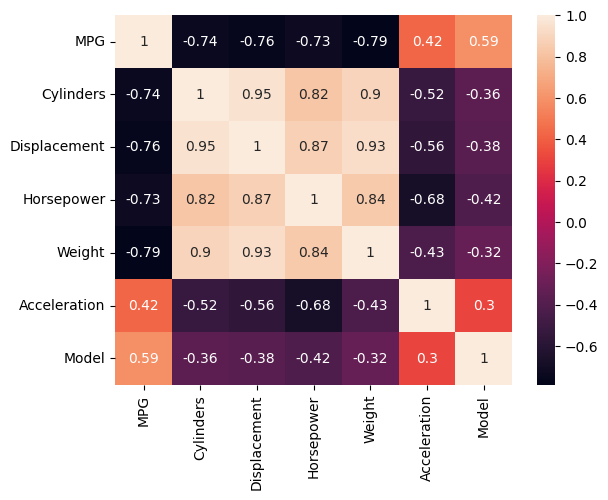

In [191]:
sn.heatmap(corr_matrix, annot=True)
plt.show()

A correlation matrix is a valuable tool in data mining and machine learning, particularly for feature selection, dimensionality reduction, and understanding relationships between variables. Indeed, in machine learning, highly correlated features (both positive and negative) often provide redundant information. Using a correlation matrix, you can identify pairs of variables that are highly correlated (correlation values close to +1 or -1). Including both in a model may lead to multicollinearity, making the model more complex, harder to interpret, and less stable. In addition, the correlation matrix gives insight into relationships between independent variables, and between the independent and dependent variables. This can guide feature engineering, where you might create new features that capture those relationships more effectively.

### Clustering using K-means and PCA

Visualizing the clustering results can become challenging when working with datasets with multiple features, especially if there are more than two dimensions. In such cases, Principal Component Analysis (PCA) plays a crucial role in reducing the dimensionality of the data while preserving as much of the variance as possible. PCA allows us to project high-dimensional data into a lower-dimensional space, typically two or three dimensions, which makes it feasible to represent the data in a scatter plot.

In [192]:
from sklearn.cluster import KMeans

kmeans = KMeans(init="random", n_clusters=3, n_init=10, random_state=1) # The KMeans class in instanciate
kmeans.fit(df2) # The instance of KMeans class is applied to our dataframe
kmeans.labels_ # Method to show the labels/clusters for each row

array([0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 2, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 2, 0, 2, 2,
       2, 2, 2, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2,
       1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 1, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2,
       0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 0,
       2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 2,

In [193]:
df2['cluster'] = kmeans.labels_

In [194]:
df2.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,cluster
1,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,0
2,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1
3,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,0
4,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,0
5,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,0


Now, we can take two features to visualize the clusters formed. For example, we use displacement (on the X-axis) and acceleration (on the Y-axis) as features, and the *cluster* feature is used to color our statements. The following line does this.

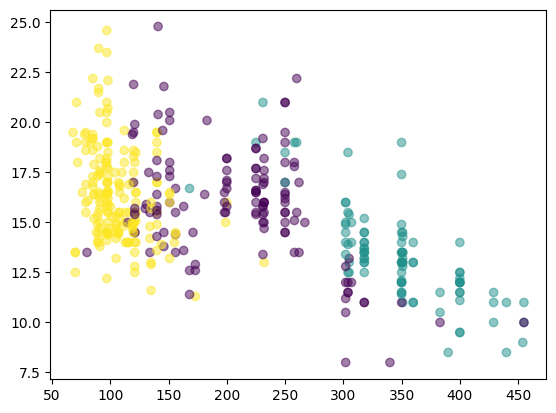

In [195]:
plt.scatter(df2.Displacement, df2.Acceleration, c = df2.cluster, alpha=0.5)

As we can see in the previous plot, visualizing clustering becomes problematic, especially if the dataset has many features. Scatter plots are inherently two-dimensional, meaning they can only effectively display two variables simultaneously. If a dataset contains more than two features, it is impossible to represent all the dimensions simultaneously in a single plot, which leads to the loss of important information. Additionally, attempting to visualize multiple feature combinations separately can result in a cluttered and confusing interpretation of the clustering results. Therefore, reducing dimensionality, for instance, using techniques like PCA, is crucial to clarify the most significant patterns from the data and provide a clearer, more interpretable visualization of clusters.

### Challenge 1 (2 puntos)

In this challenge, we will apply Principal Component Analysis (PCA) to visualize the results of a clustering algorithm on a multi-dimensional dataset. The goal is to reduce the dimensionality of the dataset to two principal components and plot a scatter plot where each data point is colored according to its assigned cluster. The steps involve applying a clustering algorithm (e.g., K-means) to a dataset dataframe called DF2, then using PCA to project the data into a 2D space. The resulting scatter plot should clearly show the distribution of the clusters, allowing for an intuitive visual analysis of their separation. 

**Note**: Remember that the PCA technique should only use features describing the vehicles. Then, the new column called cluster should be integrated after the PCA results.

In [197]:
# Here your code

from sklearn.decomposition import PCA

# Assuming that 'feature_columns' contains the names of the features describing the vehicles.
feature_columns = df2.columns[:-1]  # Adjust this to exclude non-feature columns, if necessary.

# Extract the features for clustering
X = df2[feature_columns]

# Apply K-means clustering
n_clusters = 3  # Set the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X)

# Add the cluster labels to the original DataFrame
df2['cluster'] = clusters

# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['cluster'] = clusters  # Add cluster information


c:\Users\Alex\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


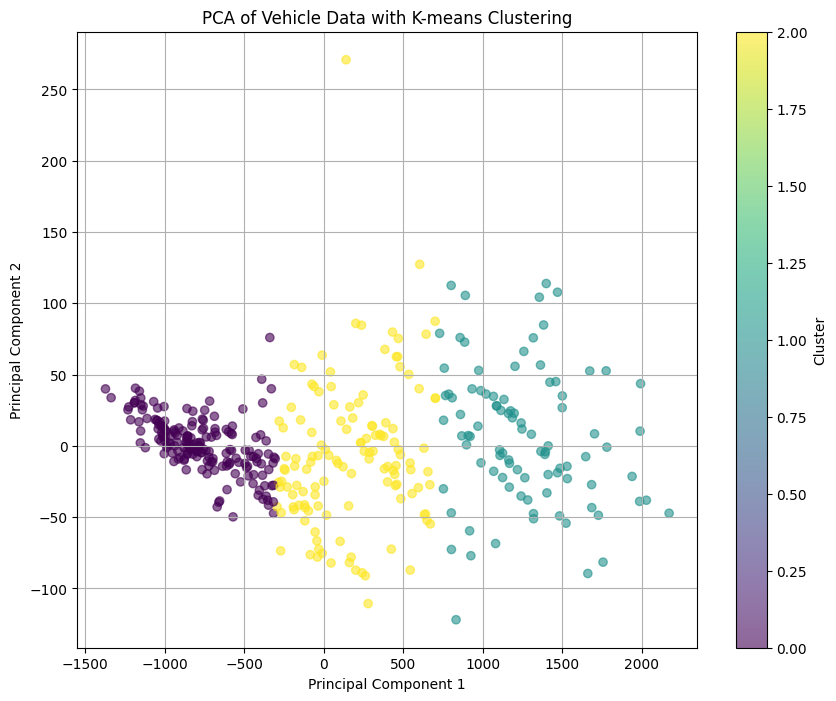

In [198]:
# Plotting the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['cluster'], cmap='viridis', alpha=0.6)
plt.title('PCA of Vehicle Data with K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()
